In [401]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"

#Parse and remove unnecessary values for our 5 unique features
df = pd.read_csv(url, sep=';')
dfconsise = df.loc[:, ["TurId", "Kommune","Dato", "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra", "Passasjerer_Ombord"]]
dfconsise.head(10)

,TurId,Kommune,Dato,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,Bærum,10/08/2020,10:53:53,10:53:00,5
1,15002-2020-08-15T12:54:00+02:00,Bærum,15/08/2020,13:12:20,13:12:00,5
2,15004-2020-08-03T09:54:00+02:00,Bærum,03/08/2020,10:18:56,10:19:00,6
3,15003-2020-07-27T13:00:00+02:00,Bærum,27/07/2020,13:52:04,13:51:00,10
4,15002-2020-08-27T07:15:00+02:00,Bærum,27/08/2020,07:34:13,07:33:00,10
5,3110-2020-08-01T16:16:00+02:00,Bjerke,01/08/2020,17:22:56,17:16:00,8
6,15010-2020-07-28T13:09:00+02:00,Bærum,28/07/2020,13:19:00,13:17:00,1
7,15003-2020-07-27T06:18:00+02:00,St.Hanshaugen,27/07/2020,06:20:24,06:20:00,-1
8,21002-2020-08-16T14:33:00+02:00,Bærum,16/08/2020,15:10:12,15:09:00,2
9,15002-2020-08-13T18:09:00+02:00,Bærum,13/08/2020,18:37:41,18:29:00,4


In [402]:
#Replace empty with Na and removes all Na values (drops all the rows and resets the index)
#converts to datetime first to catch the null values
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df = df.drop(["Holdeplass_Fra", "Holdeplass_Til","Linjetype","Linjefylke","Område","Fylke","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra","Linjenavn", "Linjeretning","Kjøretøy_Kapasitet"], axis=1)
df = df.replace(r'^\s*$', np.nan, regex=True)  # Replace blank values with np.nan values
df = df.dropna()
df = df.reset_index(drop=True)


In [403]:
#removes negative values in 'Passasjerer_ombord'
for index, row in df.iterrows():
    row['Passasjerer_Ombord'] = pd.to_numeric(row['Passasjerer_Ombord'])
    if row['Passasjerer_Ombord'] < 0:
        df.loc[index, 'Passasjerer_Ombord'] = row['Passasjerer_Ombord']*-1


In [404]:
#How many departues per day (dep_per_day)
dfdato = df['Dato'].value_counts().rename_axis('Dato').to_frame('Antall')
dfdato.head(20)

,Antall
Dato,
18/08/2020,110
19/08/2020,106
24/08/2020,100
28/08/2020,98
29/07/2020,97
17/07/2020,95
20/08/2020,94
17/08/2020,94
21/08/2020,91


<function matplotlib.pyplot.show(close=None, block=None)>

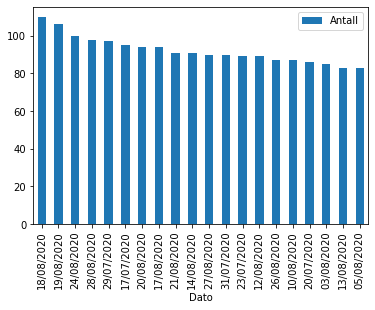

In [405]:
dfdato1 = dfdato.head(20)
dfdato1.plot.bar()
plt.show

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Bærum'),
  Text(1, 0, 'Bjerke'),
  Text(2, 0, 'St.Hanshaugen'),
  Text(3, 0, 'Indre Østfold'),
  Text(4, 0, 'Ullensaker'),
  Text(5, 0, 'Sentrum'),
  Text(6, 0, 'Eidsvoll'),
  Text(7, 0, 'Lørenskog'),
  Text(8, 0, 'Asker'),
  Text(9, 0, 'Lillestrøm'),
  Text(10, 0, 'Rælingen'),
  Text(11, 0, 'Alna'),
  Text(12, 0, 'Aurskog-Høland'),
  Text(13, 0, 'Gamle Oslo'),
  Text(14, 0, 'Nannestad'),
  Text(15, 0, 'Hurdal'),
  Text(16, 0, 'Gjerdrum'),
  Text(17, 0, 'Enebakk'),
  Text(18, 0, 'Stovner'),
  Text(19, 0, 'Nes'),
  Text(20, 0, 'Grünerløkka'),
  Text(21, 0, 'Nordmarka'),
  Text(22, 0, 'Grorud'),
  Text(23, 0, 'Ullern'),
  Text(24, 0, 'Vestre Aker'),
  Text(25, 0, 'Nittedal'),
  Text(26, 0, 'Nordstrand'),
  Text(27, 0, 'Nordre Follo'),
  Text(28, 0, 'Sagene'),
  Text(29, 0, 'Søndre Nordstrand'),
  Text(30, 0, 'Nordre Aker')

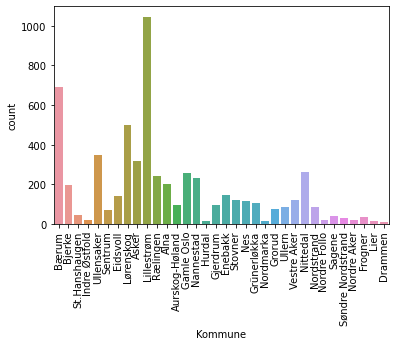

In [406]:
# unique feature, here you wil see how many departues there are from the different "kommune" (dep_per_kommune)
df['Kommune'].value_counts()

In [407]:
#Creates a Delay column 
df['delay'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
    
df.head()


,TurId,Dato,Kommune,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Passasjerer_Ombord,delay
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Bærum,2021-09-24 10:53:53,2021-09-24 10:53:00,5,0 days 00:00:53
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Bærum,2021-09-24 13:12:20,2021-09-24 13:12:00,5,0 days 00:00:20
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Bærum,2021-09-24 10:18:56,2021-09-24 10:19:00,6,-1 days +23:59:56
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Bærum,2021-09-24 13:52:04,2021-09-24 13:51:00,10,0 days 00:01:04
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Bærum,2021-09-24 07:34:13,2021-09-24 07:33:00,10,0 days 00:01:13


In [408]:
#Fjerner negative dager i delay og setter den til 00:00:00
for index, row in df.iterrows():
    if row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']:
        df.loc[index, 'delay'] = pd.to_datetime("00:00:00") - pd.to_datetime("00:00:00")

df

,TurId,Dato,Kommune,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Passasjerer_Ombord,delay
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Bærum,2021-09-24 10:53:53,2021-09-24 10:53:00,5,0 days 00:00:53
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Bærum,2021-09-24 13:12:20,2021-09-24 13:12:00,5,0 days 00:00:20
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Bærum,2021-09-24 10:18:56,2021-09-24 10:19:00,6,0 days 00:00:00
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Bærum,2021-09-24 13:52:04,2021-09-24 13:51:00,10,0 days 00:01:04
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Bærum,2021-09-24 07:34:13,2021-09-24 07:33:00,10,0 days 00:01:13
...,...,...,...,...,...,...,...
5770,10001-2020-06-10T15:10:00+02:00,10/06/2020,Lillestrøm,2021-09-24 16:23:18,2021-09-24 16:10:00,2,0 days 00:13:18
5771,10010-2020-06-23T05:54:00+02:00,23/06/2020,Lillestrøm,2021-09-24 06:00:32,2021-09-24 05:59:00,2,0 days 00:01:32
5772,2007-2020-06-11T17:22:00+02:00,11/06/2020,Sagene,2021-09-24 17:42:43,2021-09-24 17:32:00,3,0 days 00:10:43
5773,10004-2020-08-13T04:59:00+02:00,13/08/2020,Gamle Oslo,2021-09-24 06:00:11,2021-09-24 05:59:00,5,0 days 00:01:11


In [409]:
#Lister opp alle nullverdier i delay kolonnen
print(df[df['delay'].isnull()])

Empty DataFrame
Columns: [TurId, Dato, Kommune, Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra, Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, Passasjerer_Ombord, delay]
Index: []


In [410]:

#Setter nullverdier til 00:00:00 
df['delay'] = df['delay'].fillna("00:00:00")


In [411]:
print(df[df['delay'].isnull()])

Empty DataFrame
Columns: [TurId, Dato, Kommune, Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra, Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, Passasjerer_Ombord, delay]
Index: []


In [412]:
df

,TurId,Dato,Kommune,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Passasjerer_Ombord,delay
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Bærum,2021-09-24 10:53:53,2021-09-24 10:53:00,5,0 days 00:00:53
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Bærum,2021-09-24 13:12:20,2021-09-24 13:12:00,5,0 days 00:00:20
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Bærum,2021-09-24 10:18:56,2021-09-24 10:19:00,6,0 days 00:00:00
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Bærum,2021-09-24 13:52:04,2021-09-24 13:51:00,10,0 days 00:01:04
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Bærum,2021-09-24 07:34:13,2021-09-24 07:33:00,10,0 days 00:01:13
...,...,...,...,...,...,...,...
5770,10001-2020-06-10T15:10:00+02:00,10/06/2020,Lillestrøm,2021-09-24 16:23:18,2021-09-24 16:10:00,2,0 days 00:13:18
5771,10010-2020-06-23T05:54:00+02:00,23/06/2020,Lillestrøm,2021-09-24 06:00:32,2021-09-24 05:59:00,2,0 days 00:01:32
5772,2007-2020-06-11T17:22:00+02:00,11/06/2020,Sagene,2021-09-24 17:42:43,2021-09-24 17:32:00,3,0 days 00:10:43
5773,10004-2020-08-13T04:59:00+02:00,13/08/2020,Gamle Oslo,2021-09-24 06:00:11,2021-09-24 05:59:00,5,0 days 00:01:11
